# ARIMA(

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
warnings.filterwarnings(action="ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/dataset/머신러닝/sales-of-shampoo.csv'
shampoo = pd.read_csv(path)
shampoo

,Month,Sales of shampoo
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [5]:
shampoo["Month"]
# 1900년대로 보기
"190" + shampoo["Month"]

# month 저장
shampoo["Month"] = "190" + shampoo["Month"]

# 190추가 되면서 문자열로 변경 된걸 다시 datetime으로 변경
shampoo["Month"] = pd.to_datetime(shampoo["Month"])

# 날짜로 인덱스
shampoo.set_index("Month", inplace=True)

# 1902년 12월1일까지 Sales of shampoo 컬럼을 decomposition에 저장
# seasonal_decompose : 데이터가 계절성이 있는지 없는지 분석 결과 4개 나옴
decomposition = seasonal_decompose(shampoo.loc[ : "1902-12-01", "Sales of shampoo"])

<Figure size 432x288 with 0 Axes>

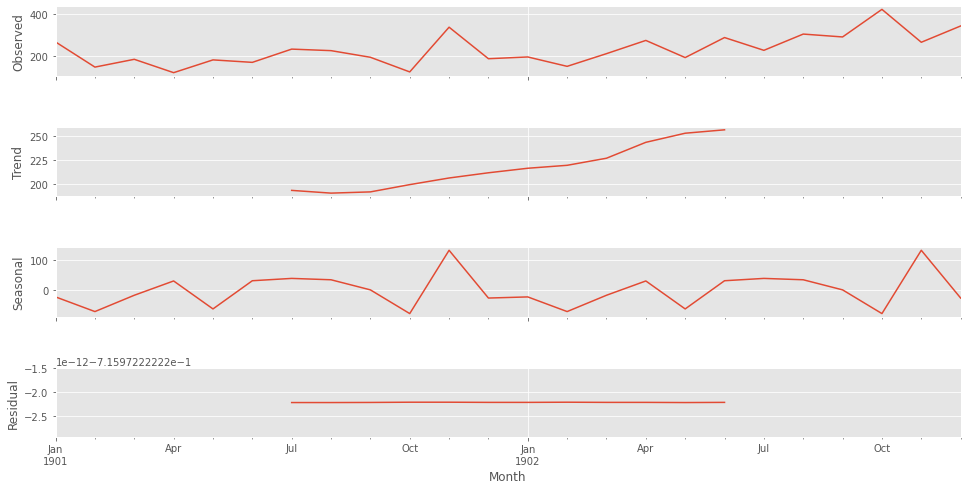

In [6]:
plt.style.use("ggplot")
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [7]:
# ADF 안전성 테스트
# 1902-12-01까지 Sales of shampoo  컬럼이 안정적 데이터인지 조회
result = adfuller(shampoo.loc[:"1902-12-01", "Sales of shampoo"])
# 0.5이상으로 안정적이지 않음
result[1]

0.6330251367945249

In [8]:
# order(p,d,q)
# p(AR) : 1 앞에 진짜 1개 사용
# d : 0 (전 진짜- 전전 진짜) 사용안함
# q(MA) : 1 (전 진짜 - 전 예측) 사용
arima = ARIMA(shampoo.loc[:"1902-12-01","Sales of shampoo"], order= (1, 0, 1) )
results = arima.fit()
results.summary()
print( results.summary() )

# 1901-01-01 ~ 1902-12-01 샴푸 판매량 입력 예측
print(results.predict())
print("="*50)


# 위에서 ARIMA 1901년 1월 ~ 1902년 12월까지 데이터 줌
# results.forecast(n) : n개 예측
# 1903-01-01 샴푸 판매량 예측
print(results.forecast())
print("="*50)

# 1903-01-01/02-01 샴푸 판매량 예측
# 못 본 데이터의 예측
print("가진 데이터로 2개 예측 : ",results.forecast(2))
print("="*50)

# 예측값 1903-01-01 ~ 12-01 샴푸판매량 예측
print("가진 데이터로 12개 예측 : ",results.forecast(12))
print("="*50)

                              ARMA Model Results                              
Dep. Variable:       Sales of shampoo   No. Observations:                   24
Model:                     ARMA(1, 1)   Log Likelihood                -134.945
Method:                       css-mle   S.D. of innovations             66.375
Date:                Fri, 03 Sep 2021   AIC                            277.890
Time:                        00:57:11   BIC                            282.602
Sample:                    01-01-1901   HQIC                           279.140
                         - 12-01-1902                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    239.4931     36.630      6.538      0.000     167.700     311.286
ar.L1.Sales of shampoo     0.8893      0.148      6.020      0.000       0.600       1.179
ma.L

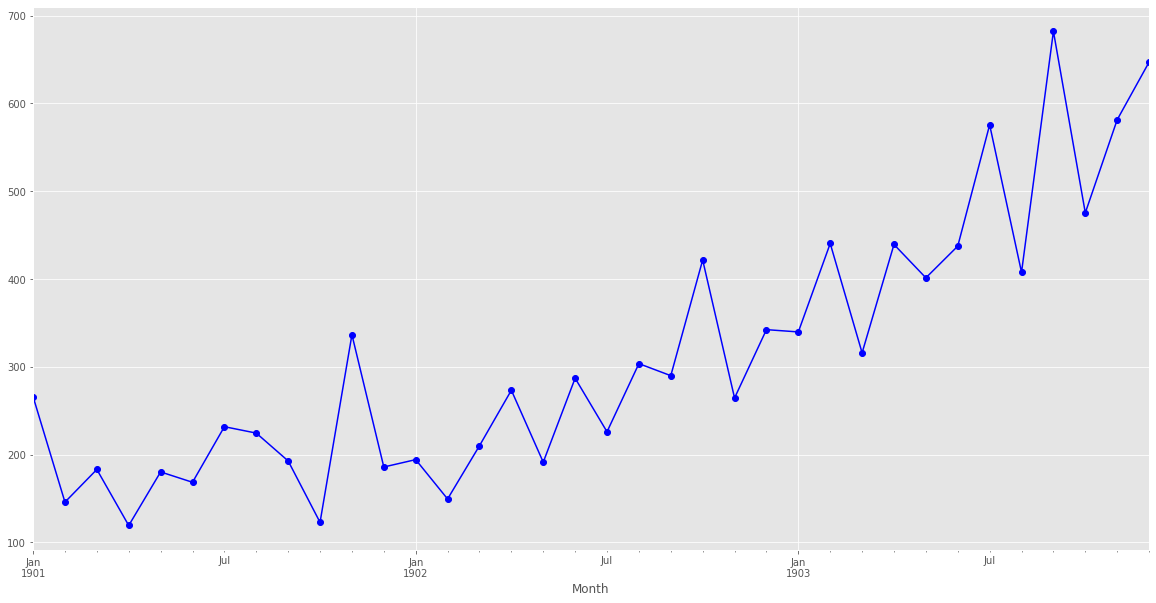

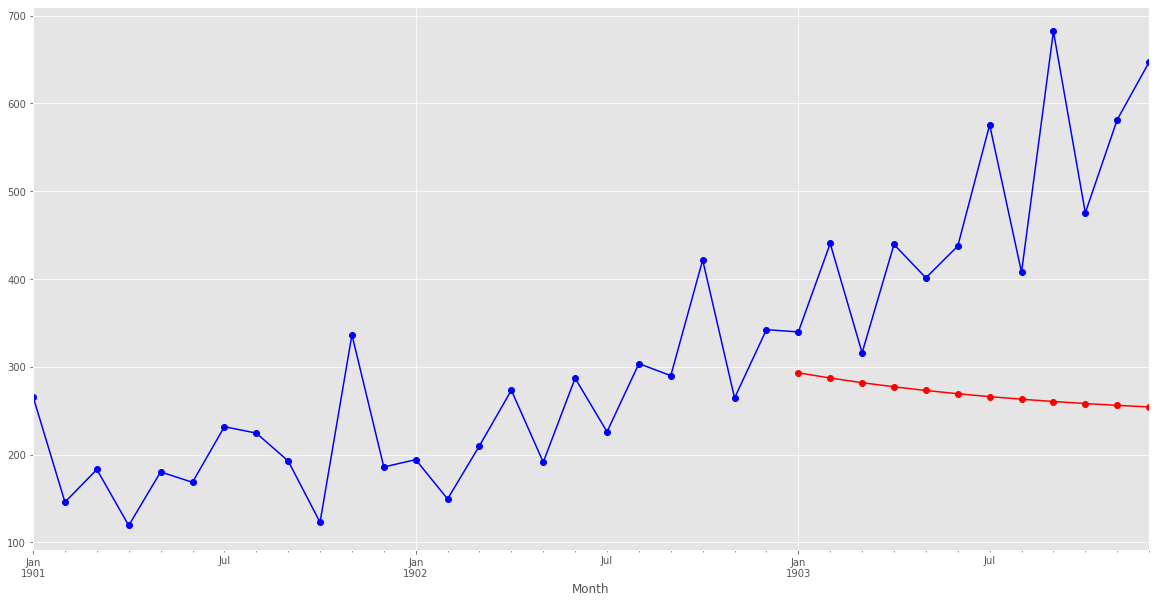

In [9]:
# 1903-01-01부터 끝까지 예측값을 이용해 12개를 예측한걸 list
shampoo.loc["1903-01-01": , "pred"] = results.forecast(12)[0].tolist()

plt.figure(figsize=(20,10))
shampoo.loc[ : , "Sales of shampoo"].plot(color='b', marker="o")



plt.figure(figsize=(20,10))
shampoo.loc[ : , "Sales of shampoo"].plot(color='b', marker="o")
shampoo.loc["1903-01-01": ,"pred"].plot(color="r", marker="o")

In [10]:
p = range(0,5)
d = range(0,5)
q = range(0,5)
# itertools : 반복해야하는 작업을 한번에 해주는 함수!
# product(데카르트 곱) :  두 집합으로부터 각각 원소를 하나씩 고른 순서쌍으로 이루어진 집합을 만들어주는 연산
# itertools.product() : 반복작업을 해줄껀데  -> 데카르트 곱으로 반복해주자
order_list = list( itertools.product(p,d,q) )
order_list[:5]

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4)]

In [17]:
# 하나꺼내서 oder에 담음
for od in order_list:
  # 반복문 안에서 에러가 발생하면 반복문 종료
  try:
    # ARIMA 객체 생성 #ARMA -> ARIMA 오타수정~
    mod = ARIMA(shampoo.loc[ : "1902-12-01", "Sales of shampoo"], order = od)
    results = mod.fit()
    print("od : ", od)
    print("aic = ", results.aic)
    print("="*70)
  except:
    print("에러가 발행하여 except 실행하고 다음으로 넘어갑니다")
    print("="*70)

od :  (0, 0, 0)
aic =  278.35844247997494
od :  (0, 0, 1)
aic =  279.64882564725986
od :  (0, 0, 2)
aic =  277.3569342038186
od :  (0, 0, 3)
aic =  279.3549897790987
od :  (0, 0, 4)
aic =  275.63306743255146
od :  (0, 1, 0)
aic =  276.1437876372572
od :  (0, 1, 1)
aic =  262.12195054922984
od :  (0, 1, 2)
aic =  263.31062361813906
에러가 발행하여 except 실행하고 다음으로 넘어갑니다
에러가 발행하여 except 실행하고 다음으로 넘어갑니다
od :  (0, 2, 0)
aic =  290.51290649865757
od :  (0, 2, 1)
aic =  270.04641807133885
에러가 발행하여 except 실행하고 다음으로 넘어갑니다
에러가 발행하여 except 실행하고 다음으로 넘어갑니다
에러가 발행하여 except 실행하고 다음으로 넘어갑니다
에러가 발행하여 except 실행하고 다음으로 넘어갑니다
에러가 발행하여 except 실행하고 다음으로 넘어갑니다
에러가 발행하여 except 실행하고 다음으로 넘어갑니다
에러가 발행하여 except 실행하고 다음으로 넘어갑니다
에러가 발행하여 except 실행하고 다음으로 넘어갑니다
에러가 발행하여 except 실행하고 다음으로 넘어갑니다
에러가 발행하여 except 실행하고 다음으로 넘어갑니다
에러가 발행하여 except 실행하고 다음으로 넘어갑니다
에러가 발행하여 except 실행하고 다음으로 넘어갑니다
에러가 발행하여 except 실행하고 다음으로 넘어갑니다
od :  (1, 0, 0)
aic =  278.9512285884889
od :  (1, 0, 1)
aic =  277.8896424156886
od :  (1, 0, 2)
aic =

In [12]:
model = ARIMA(shampoo.loc[ : "1902-12-01", "Sales of shampoo"] , order = (1, 2, 2))
results = model.fit()
print(results.summary())

                              ARIMA Model Results                              
Dep. Variable:     D2.Sales of shampoo   No. Observations:                   22
Model:                  ARIMA(1, 2, 2)   Log Likelihood                -123.561
Method:                        css-mle   S.D. of innovations             52.976
Date:                 Fri, 03 Sep 2021   AIC                            257.122
Time:                         00:57:22   BIC                            262.577
Sample:                     03-01-1901   HQIC                           258.407
                          - 12-01-1902                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.9549      0.344      2.778      0.012       0.281       1.629
ar.L1.D2.Sales of shampoo    -0.3019      0.214     -1.408      0.176      -0.

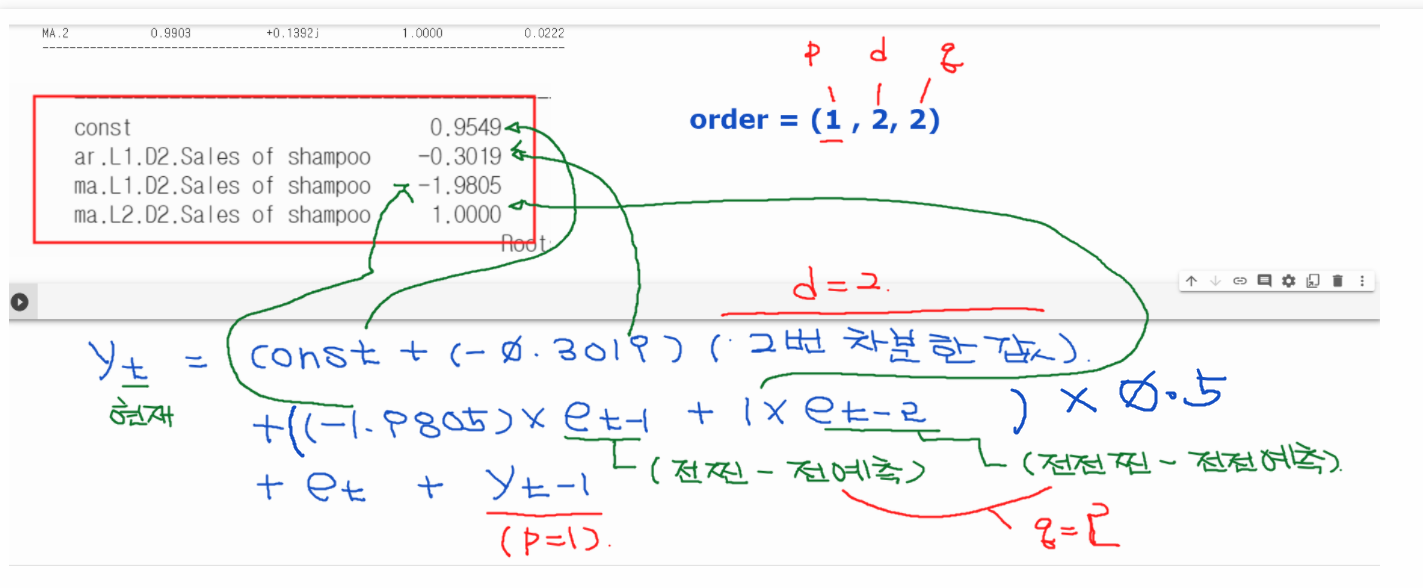

In [13]:
# 1902년 12월 1일 이후의 12달 예측
results.forecast(12)
results.forecast(12)[0]
results.forecast(12)[0].tolist()
shampoo.loc["1903-01-01": ,"pred"] = results.forecast(12)[0].tolist()

In [14]:
shampoo

,Sales of shampoo,pred
Month,,
1901-01-01,266.0,NaN
1901-02-01,145.9,NaN
1901-03-01,183.1,NaN
1901-04-01,119.3,NaN
1901-05-01,180.3,NaN
1901-06-01,168.5,NaN
1901-07-01,231.8,NaN
1901-08-01,224.5,NaN
1901-09-01,192.8,NaN


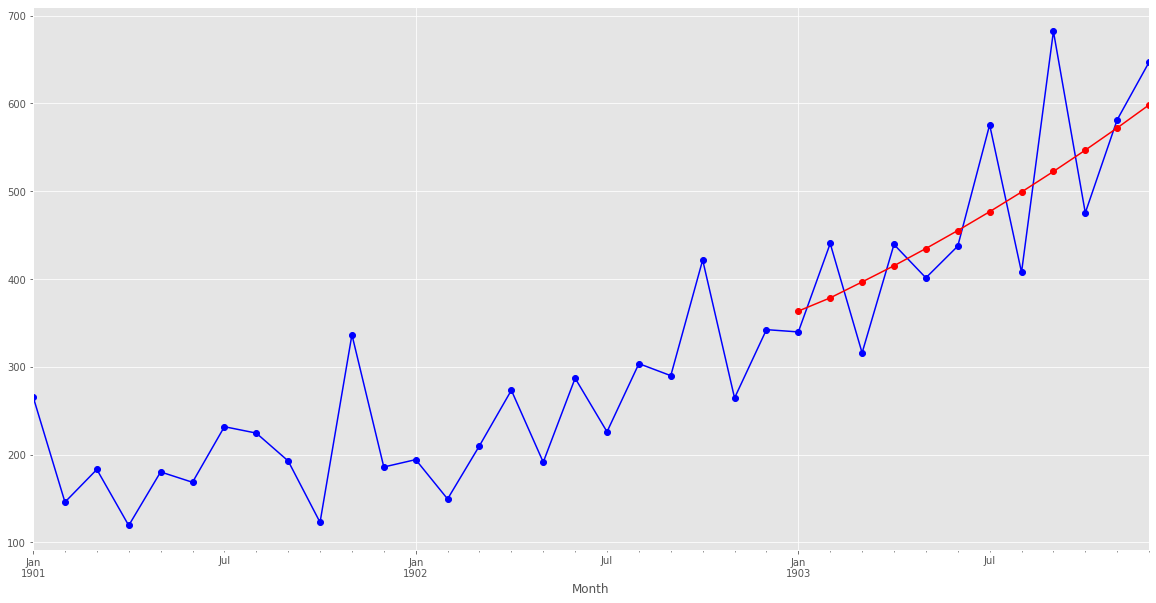

In [15]:
plt.figure(figsize=(20, 10))
shampoo.loc[ : , "Sales of shampoo"].plot(color="b", marker='o')
shampoo.loc["1903-01-01": , "pred"].plot(color="r", marker='o')

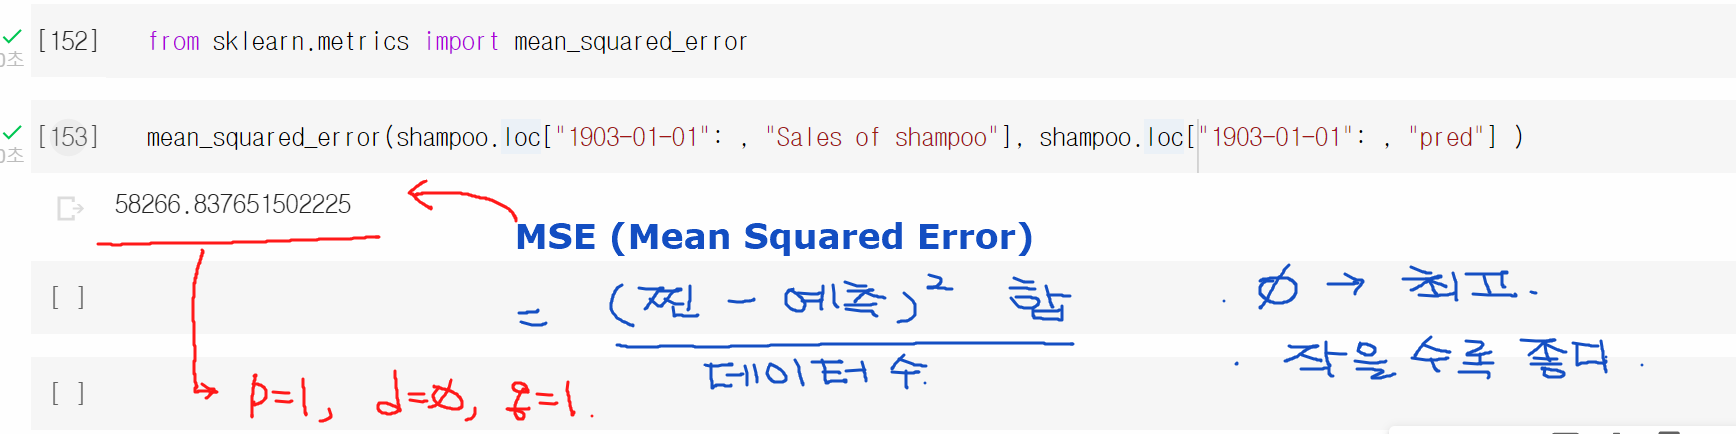

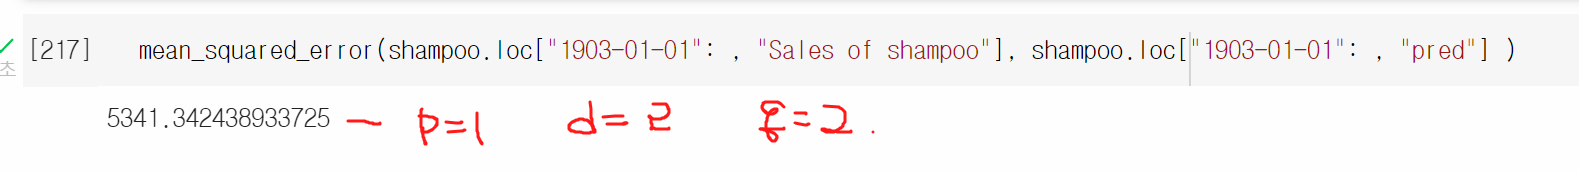

In [16]:
# M...  뭐더라
mean_squared_error(shampoo.loc["1903-01-01": , "Sales of shampoo"], shampoo.loc["1903-01-01": , "pred"] )

5341.342438933725